 # Background
 
 Watch this Youtube and follow along the material in Chapter 12
 

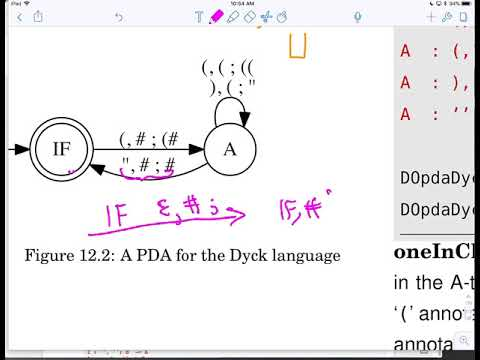

In [1]:
# This Youtube video walks through this notebook
from IPython.display import YouTubeVideo
YouTubeVideo('cvVl1lQ4agU')

In [2]:
import sys

# For ClassMaterial/... we must set three levels of paths
#
sys.path[0:0] = ['../..',      '../../3rdparty', 
                 '../../..',   '../../../3rdparty',
                 '../../../..','../../../../3rdparty'
                ] 
from jove.SystemImports import *
from jove.DotBashers    import *
from jove.Def_md2mc      import *
from jove.Def_PDA        import *

# To get animations going, import this
from jove.JoveEditor import *


You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(explore_pda)
help(run_pda)
help(classify_l_id_path)
help(h_run_pda)
help(interpret_w_eps)
help(step_pda)
help(suvivor_id)
help(term_id)
help(final_id)
help(cvt_str_to_sym)
help(is_surv_id)
help(subsumed)
help(is_term_id)
help(is_final_id)



In [4]:
pdaex1 = md2mc('''PDA
I : a, b; c -> A

I : a, ''; c -> B

I : '', b; c -> C

I : '',''; c -> D

I : '',''; '' -> E
''')

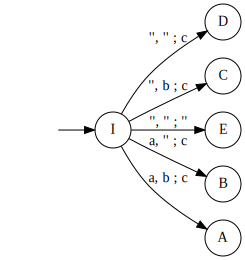

In [8]:
dotObj_pda(pdaex1)

In [9]:
pdaex2 = md2mc('''PDA
I : a, b; c -> FA

I : a, ''; c -> FB

I : '', b; c -> FC

I : '',''; c -> FD

I : '',''; '' -> FE
''')

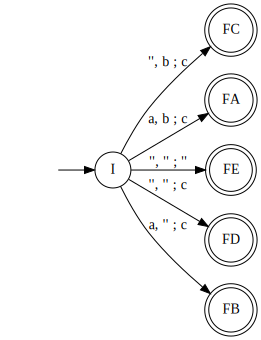

In [10]:
dotObj_pda(pdaex2)

In [7]:
JoveEditor(examples=False)

In [12]:
help(explore_pda)

Help on function explore_pda in module jove.Def_PDA:

explore_pda(inp, P, acceptance='ACCEPT_F', STKMAX=6, chatty=False)
    A handy routine to print the result of run_pda plus making 
    future extensions to explore run-results.



In [14]:
explore_pda('a',pdaex2)

*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String a accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('FB', '', 'c#')
Reached as follows:
->  ('I', 'a', '#')
->  ('FB', '', 'c#') .


In [15]:
explore_pda('aa',pdaex2)

*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String aa rejected by your PDA :-(
Visited states are:
{('FB', 'a', 'c#'), ('FE', 'aa', '#'), ('I', 'aa', '#'), ('FD', 'aa', 'c#')}


Generating LALR tables


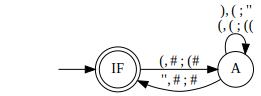

In [3]:
# Let us see the PDA for the Dyck language in Jove PDA Markdown Syntax

pdaDyck = md2mc('''PDA
IF : (, #; (# -> A
A  : (, (; (( -> A
A  : ), (; '' -> A
A  : '',#; #  -> IF
''')
DOpdaDyck = dotObj_pda(pdaDyck, FuseEdges=True)
DOpdaDyck

In [12]:
# The command to run a PDA is explore_pda . Get its help
help(explore_pda)

Help on function explore_pda in module jove.Def_PDA:

explore_pda(inp, P, acceptance='ACCEPT_F', STKMAX=6, chatty=False)
    A handy routine to print the result of run_pda plus making 
    future extensions to explore run-results.



In [16]:
explore_pda('(())', pdaDyck)

*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String (()) accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', '(())', '#')
->  ('A', '())', '(#')
->  ('A', '))', '((#')
->  ('A', ')', '(#')
->  ('A', '', '#')
->  ('IF', '', '#') .


In [ ]:
# This is an attempt to solve the ww^R problem guessing the midpoint
# Is this solution right? You'll know soon!

midptPDA = 
'''
!! Stack everything upto a point; then choose to evolve in an ND manner

IF : 0,#; 0# | 1,#; 1# | 0,0; 00 | 1,1; 11 | 0,1; 01 | 1,0; 10 
'''

In [15]:
# Let us design a PDA for ww^R
# Do we know the midpoint? 
# Guess!

JoveEditor(examples=False)

In [7]:
# Let us see this in Animation mode
# Obtain a starter file and see what it has
# Click on the PDA Tab

JoveEditor(examples=True)

In [4]:
explore_pda("", pdaDyck)

*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String  accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', '', '#') .


In [5]:
explore_pda("()", pdaDyck)

*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String () accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', '()', '#')
->  ('A', ')', '(#')
->  ('A', '', '#')
->  ('IF', '', '#') .


In [6]:
explore_pda("()()(())", pdaDyck)

*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String ()()(()) accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', '()()(())', '#')
->  ('A', ')()(())', '(#')
->  ('A', '()(())', '#')
->  ('IF', '()(())', '#')
->  ('A', ')(())', '(#')
->  ('A', '(())', '#')
->  ('IF', '(())', '#')
->  ('A', '())', '(#')
->  ('A', '))', '((#')
->  ('A', ')', '(#')
->  ('A', '', '#')
->  ('IF', '', '#') .


In [7]:
explore_pda("()()(()", pdaDyck)  

*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String ()()(() rejected by your PDA :-(
Visited states are:
{('IF', '()(()', '#'), ('A', '(()', '#'), ('A', '()', '(#'), ('A', '()(()', '#'), ('A', ')', '((#'), ('A', '', '(#'), ('A', ')()(()', '(#'), ('IF', '()()(()', '#'), ('A', ')(()', '(#'), ('IF', '(()', '#')}


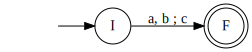

In [8]:
pda1 = md2mc('''PDA
I : a, b; c -> F
''')
DOpda1 = dotObj_pda(pda1, FuseEdges=True)
DOpda1

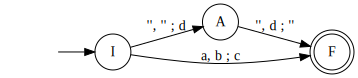

In [9]:
pda2 = md2mc('''PDA
I : a, b  ; c  -> F
I : '', ''; d  -> A
A : '', d ; '' -> F
''')
DOpda2 = dotObj_pda(pda2, FuseEdges=True)
DOpda2

In [10]:
explore_pda("a", pda1)

*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String a rejected by your PDA :-(
Visited states are:
{('I', 'a', '#')}


In [11]:
explore_pda("a", pda2)

*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String a rejected by your PDA :-(
Visited states are:
{('F', 'a', '#'), ('A', 'a', 'd#'), ('I', 'a', '#')}


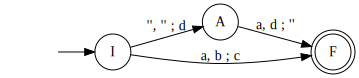

In [12]:
pda3 = md2mc('''PDA
I : a, b  ; c  -> F
I : '', ''; d  -> A
A : a, d ; '' -> F
''')
DOpda3 = dotObj_pda(pda3, FuseEdges=True)
DOpda3

In [13]:
explore_pda("a", pda3)

*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String a accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'a', '#')
->  ('A', 'a', 'd#')
->  ('F', '', '#') .


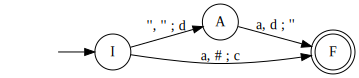

In [14]:
pda4 = md2mc('''PDA
I : a, #  ; c  -> F
I : '', ''; d  -> A
A : a, d ; '' -> F
''')
DOpda4 = dotObj_pda(pda4, FuseEdges=True)
DOpda4

In [15]:
explore_pda("a", pda4)

*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String a accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', 'c')
Reached as follows:
->  ('I', 'a', '#')
->  ('F', '', 'c') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'a', '#')
->  ('A', 'a', 'd#')
->  ('F', '', '#') .


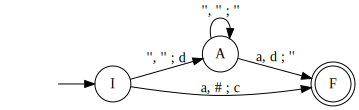

In [16]:
pda5 = md2mc('''PDA
I : a, #  ; c  -> F
I : '', ''; d  -> A
A : '', ''; '' -> A
A : a, d ; '' -> F
''')
DOpda5 = dotObj_pda(pda5, FuseEdges=True)
DOpda5

In [17]:
explore_pda("a", pda5)

*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String a accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', 'c')
Reached as follows:
->  ('I', 'a', '#')
->  ('F', '', 'c') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'a', '#')
->  ('A', 'a', 'd#')
->  ('F', '', '#') .


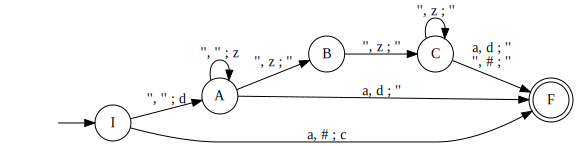

In [18]:
pda6 = md2mc('''PDA
I : a, #  ; c  -> F
I : '', ''; d  -> A
A : '', ''; z  -> A
A : '', z ; '' -> B
B : '', z ; '' -> C
C : '', z ; '' -> C
C : '', # ; '' | a, d; '' -> F
A : a, d ; ''  -> F
''')
DOpda6 = dotObj_pda(pda6, FuseEdges=True)
DOpda6

In [19]:
explore_pda("a", pda6)

*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String a accepted by your PDA in 3 ways :-) 
Here are the ways: 
Final state  ('F', '', 'c')
Reached as follows:
->  ('I', 'a', '#')
->  ('F', '', 'c') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'a', '#')
->  ('A', 'a', 'd#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'a', '#')
->  ('A', 'a', 'd#')
->  ('A', 'a', 'zd#')
->  ('A', 'a', 'zzd#')
->  ('B', 'a', 'zd#')
->  ('C', 'a', 'd#')
->  ('F', '', '#') .


In [20]:
explore_pda("a", pda6, chatty=True)

*** Exploring wrt STKMAX =  6 ; increase it if needed ***
s_terminal_id =  {('C', 'a', 'zzd#'), ('F', '', '#'), ('C', 'a', 'd#'), ('A', 'a', 'zzzzzzd#'), ('C', 'a', 'zd#')}
l_final_id_path =  [(('F', '', 'c'), [('I', 'a', '#')]), (('F', '', '#'), [('I', 'a', '#'), ('A', 'a', 'd#')]), (('F', '', '#'), [('I', 'a', '#'), ('A', 'a', 'd#'), ('A', 'a', 'zd#'), ('A', 'a', 'zzd#'), ('B', 'a', 'zd#'), ('C', 'a', 'd#')])]
s_visited_id =  {('A', 'a', 'zzzzd#'), ('C', 'a', 'zzd#'), ('C', 'a', 'zzzd#'), ('A', 'a', 'zzzzzd#'), ('F', '', 'c'), ('A', 'a', 'zzd#'), ('B', 'a', 'zzzd#'), ('F', '', '#'), ('A', 'a', 'zzzd#'), ('A', 'a', 'd#'), ('B', 'a', 'zzzzd#'), ('A', 'a', 'zd#'), ('I', 'a', '#'), ('B', 'a', 'd#'), ('C', 'a', 'zd#'), ('B', 'a', 'zd#'), ('C', 'a', 'd#'), ('B', 'a', 'zzd#')}
String a accepted by your PDA in 3 ways :-) 
Here are the ways: 
Final state  ('F', '', 'c')
Reached as follows:
->  ('I', 'a', '#')
->  ('F', '', 'c') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'a', 

In [21]:
explore_pda("a", pda6, STKMAX = 6, chatty=True)

*** Exploring wrt STKMAX =  6 ; increase it if needed ***
s_terminal_id =  {('C', 'a', 'zzd#'), ('F', '', '#'), ('C', 'a', 'd#'), ('A', 'a', 'zzzzzzd#'), ('C', 'a', 'zd#')}
l_final_id_path =  [(('F', '', 'c'), [('I', 'a', '#')]), (('F', '', '#'), [('I', 'a', '#'), ('A', 'a', 'd#')]), (('F', '', '#'), [('I', 'a', '#'), ('A', 'a', 'd#'), ('A', 'a', 'zd#'), ('A', 'a', 'zzd#'), ('B', 'a', 'zd#'), ('C', 'a', 'd#')])]
s_visited_id =  {('A', 'a', 'zzzzd#'), ('C', 'a', 'zzd#'), ('C', 'a', 'zzzd#'), ('A', 'a', 'zzzzzd#'), ('F', '', 'c'), ('A', 'a', 'zzd#'), ('B', 'a', 'zzzd#'), ('F', '', '#'), ('A', 'a', 'zzzd#'), ('A', 'a', 'd#'), ('B', 'a', 'zzzzd#'), ('A', 'a', 'zd#'), ('I', 'a', '#'), ('B', 'a', 'd#'), ('C', 'a', 'zd#'), ('B', 'a', 'zd#'), ('C', 'a', 'd#'), ('B', 'a', 'zzd#')}
String a accepted by your PDA in 3 ways :-) 
Here are the ways: 
Final state  ('F', '', 'c')
Reached as follows:
->  ('I', 'a', '#')
->  ('F', '', 'c') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'a', 

In [22]:
f27sip = md2mc('''PDA 
!!---------------------------------------------------------------------------
!! This is a PDA From Sipser's book
!! This matches a's and b's ignoring c's
!! or matches a's and c's, ignoring b's in the middle
!! thus matching either a^m b^m c^n or a^m b^n c^m
!!---------------------------------------------------------------------------

!!---------------------------------------------------------------------------
!! State: in , sin ; spush -> tostates !! comment
!!---------------------------------------------------------------------------
iq1    : '' , ''  ; $     -> q2       !!  start in init state by pushing a $

q2     : a  , ''  ; a     -> q2       !!  stack a's
q2     : '' , ''  ; ''    -> q3,q5    !!  split non-det for a^m b^m c^n (q3)
                                      !!  or a^m b^n c^m (q5)

q3     : b  , a   ; ''    -> q3       !!  match b's against a's
q3     : '' , $   ; ''    -> fq4      !!  hope for acceptance when $ surfaces

fq4    : c  , ''  ; ''    -> fq4      !!  be happy so long as c's come
                                      !!  will choke and reject if anything
                                      !!  other than c's come

q5     : b  , ''  ; ''    -> q5       !!  here, we are going to punt over b's
q5     : '' , ''  ; ''    -> q6       !!  and non-det decide to honor c's matching
                                      !!  against a's

q6     : c  , a   ; ''    -> q6       !!  OK to match so long as c's keep coming
q6     : '' , $   ; ''    -> fq7      !!  when $ surfaces, be ready to accept in
                                      !!  state fq7. However, anything else coming in
                                      !!  now will foil match and cause rejection.
!!---------------------------------------------------------------------------
!! You may use the line below as an empty shell to populate for your purposes
!! Also serves as a syntax reminder for entering PDAs.
!!
!! State : i1 , si1 ; sp1 | i2 , si2 ; sp2 -> tos1, tos2 !! comment
!!
!! ..    : .. , ..  ; ..  | .. , ..  ; ..  -> ..  , ..   !!  ..
!!---------------------------------------------------------------------------
!!---------------------------------------------------------------------------
!!
!! Good commenting and software-engineering methods, good clean indentation,
!! grouping of similar states, columnar alignment, etc etc. are HUGELY
!! important in any programming endeavor -- especially while programming
!! automata. Otherwise, you can easily make a mistake in your automaton
!! code. Besides, you cannot rely upon others to find your mistakes, as
!! they will find your automaton code impossible to read!
!!
!!---------------------------------------------------------------------------

''')


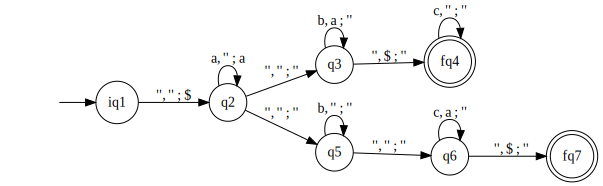

In [23]:
Dof27sip = dotObj_pda(f27sip, FuseEdges=True)
Dof27sip

In [24]:
explore_pda("aaabbbccc", f27sip)

*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String aaabbbccc accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('fq4', '', '#')
Reached as follows:
->  ('iq1', 'aaabbbccc', '#')
->  ('q2', 'aaabbbccc', '$#')
->  ('q2', 'aabbbccc', 'a$#')
->  ('q2', 'abbbccc', 'aa$#')
->  ('q2', 'bbbccc', 'aaa$#')
->  ('q3', 'bbbccc', 'aaa$#')
->  ('q3', 'bbccc', 'aa$#')
->  ('q3', 'bccc', 'a$#')
->  ('q3', 'ccc', '$#')
->  ('fq4', 'ccc', '#')
->  ('fq4', 'cc', '#')
->  ('fq4', 'c', '#')
->  ('fq4', '', '#') .
Final state  ('fq7', '', '#')
Reached as follows:
->  ('iq1', 'aaabbbccc', '#')
->  ('q2', 'aaabbbccc', '$#')
->  ('q2', 'aabbbccc', 'a$#')
->  ('q2', 'abbbccc', 'aa$#')
->  ('q2', 'bbbccc', 'aaa$#')
->  ('q5', 'bbbccc', 'aaa$#')
->  ('q5', 'bbccc', 'aaa$#')
->  ('q5', 'bccc', 'aaa$#')
->  ('q5', 'ccc', 'aaa$#')
->  ('q6', 'ccc', 'aaa$#')
->  ('q6', 'cc', 'aa$#')
->  ('q6', 'c', 'a$#')
->  ('q6', '', '$#')
->  ('fq7', '', '#') .


In [25]:
# Parsing an arithmetic expression
pdaEamb = md2mc('''PDA
!!E -> E * E | E + E | ~E | ( E ) | 2 | 3
I : '', #  ; E#  -> M
M : '', E  ; ~E  -> M
M : '', E  ; E+E -> M
M : '', E  ; E*E -> M
M : '', E  ; (E) -> M
M : '', E  ; 2   -> M
M : '', E  ; 3   -> M
M : ~,  ~  ; ''  -> M
M : 2,  2  ; ''  -> M
M : 3,  3  ; ''  -> M
M : (,  (  ; ''  -> M
M : ),  )  ; ''  -> M
M : +,  +  ; ''  -> M
M : *,  *  ; ''  -> M
M : '', #  ; #   -> F
'''
)

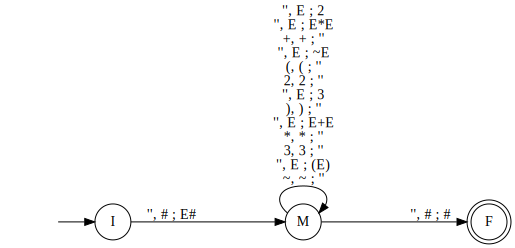

In [26]:
DOpdaEamb = dotObj_pda(pdaEamb, FuseEdges=True)
DOpdaEamb

In [27]:
explore_pda("3+2*3+2*3", pdaEamb, STKMAX=8)

*** Exploring wrt STKMAX =  8 ; increase it if needed ***
String 3+2*3+2*3 accepted by your PDA in 13 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3+2*3+2*3', '#')
->  ('M', '3+2*3+2*3', 'E#')
->  ('M', '3+2*3+2*3', 'E+E#')
->  ('M', '3+2*3+2*3', 'E+E+E#')
->  ('M', '3+2*3+2*3', '3+E+E#')
->  ('M', '+2*3+2*3', '+E+E#')
->  ('M', '2*3+2*3', 'E+E#')
->  ('M', '2*3+2*3', 'E*E+E#')
->  ('M', '2*3+2*3', '2*E+E#')
->  ('M', '*3+2*3', '*E+E#')
->  ('M', '3+2*3', 'E+E#')
->  ('M', '3+2*3', '3+E#')
->  ('M', '+2*3', '+E#')
->  ('M', '2*3', 'E#')
->  ('M', '2*3', 'E*E#')
->  ('M', '2*3', '2*E#')
->  ('M', '*3', '*E#')
->  ('M', '3', 'E#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3+2*3+2*3', '#')
->  ('M', '3+2*3+2*3', 'E#')
->  ('M', '3+2*3+2*3', 'E+E#')
->  ('M', '3+2*3+2*3', '3+E#')
->  ('M', '+2*3+2*3', '+E#')
->  ('M', '2*3+2*3', 'E#')
->  ('M', '2*3+2*3', 'E+E#')
->  ('

In [28]:
# Parsing an arithmetic expression
pdaE = md2mc('''PDA
!!E -> E+T | T
!!T -> T*F | F
!!F -> 2 | 3 | ~F | (E)
I : '', #  ; E#  -> M
M : '', E  ; E+T -> M
M : '', E  ; T   -> M
M : '', T  ; T*F -> M
M : '', T  ; F   -> M
M : '', F  ; 2   -> M
M : '', F  ; 3   -> M
M : '', F  ; ~F  -> M
M : '', F  ; (E) -> M
M : ~,  ~  ; ''  -> M
M : 2,  2  ; ''  -> M
M : 3,  3  ; ''  -> M
M : (,  (  ; ''  -> M
M : ),  )  ; ''  -> M
M : +,  +  ; ''  -> M
M : *,  *  ; ''  -> M
M : '', #  ; #   -> F
'''
)

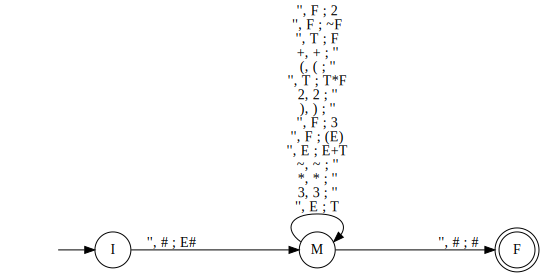

In [29]:
DOpdaE = dotObj_pda(pdaE, FuseEdges=True)
DOpdaE

In [30]:
explore_pda("3+3+2+2*3+2*3", pdaE, STKMAX=5)

*** Exploring wrt STKMAX =  5 ; increase it if needed ***
String 3+3+2+2*3+2*3 rejected by your PDA :-(
Visited states are:
{('M', '3+3+2+2*3+2*3', '(E)#'), ('M', '2+2*3+2*3', 'T*F*F#'), ('M', '3+2+2*3+2*3', 'F#'), ('M', '+2*3+2*3', '*F*F#'), ('M', '3+3+2+2*3+2*3', 'T+T#'), ('M', '2+2*3+2*3', 'T*F#'), ('M', '+2*3+2*3', '#'), ('M', '3+3+2+2*3+2*3', '(E)*F#'), ('M', '3+2+2*3+2*3', '2#'), ('M', '3+3+2+2*3+2*3', 'T+T+T#'), ('M', '+3+2+2*3+2*3', '*F*F#'), ('M', '3+3+2+2*3+2*3', '3+T+T#'), ('F', '+2*3+2*3', '#'), ('M', '3+3+2+2*3+2*3', '3*F+T#'), ('M', '2+2*3+2*3', '2*F#'), ('M', '3+2+2*3+2*3', '(E)#'), ('M', '2+2*3+2*3', 'T#'), ('M', '3+2+2*3+2*3', 'T*F*F#'), ('M', '3+3+2+2*3+2*3', '2#'), ('M', '3+3+2+2*3+2*3', '2+T+T#'), ('M', '2+2*3+2*3', '2*F*F#'), ('M', '3+2+2*3+2*3', 'T*F#'), ('M', '3+2+2*3+2*3', '~F+T#'), ('M', '3+2+2*3+2*3', 'F*F*F#'), ('M', '3+3+2+2*3+2*3', 'F#'), ('F', '+2+2*3+2*3', '#'), ('M', '2+2*3+2*3', '~F*F#'), ('M', '3+2+2*3+2*3', '3*F*F#'), ('M', '2+2*3+2*3', '(E)#'), ('M',

In [31]:
explore_pda("3*2*~3+~~3*~3", pdaEamb, STKMAX=5)

*** Exploring wrt STKMAX =  5 ; increase it if needed ***
String 3*2*~3+~~3*~3 accepted by your PDA in 24 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3*2*~3+~~3*~3', '#')
->  ('M', '3*2*~3+~~3*~3', 'E#')
->  ('M', '3*2*~3+~~3*~3', 'E+E#')
->  ('M', '3*2*~3+~~3*~3', 'E*E+E#')
->  ('M', '3*2*~3+~~3*~3', '3*E+E#')
->  ('M', '*2*~3+~~3*~3', '*E+E#')
->  ('M', '2*~3+~~3*~3', 'E+E#')
->  ('M', '2*~3+~~3*~3', 'E*E+E#')
->  ('M', '2*~3+~~3*~3', '2*E+E#')
->  ('M', '*~3+~~3*~3', '*E+E#')
->  ('M', '~3+~~3*~3', 'E+E#')
->  ('M', '~3+~~3*~3', '~E+E#')
->  ('M', '3+~~3*~3', 'E+E#')
->  ('M', '3+~~3*~3', '3+E#')
->  ('M', '+~~3*~3', '+E#')
->  ('M', '~~3*~3', 'E#')
->  ('M', '~~3*~3', '~E#')
->  ('M', '~3*~3', 'E#')
->  ('M', '~3*~3', '~E#')
->  ('M', '3*~3', 'E#')
->  ('M', '3*~3', 'E*E#')
->  ('M', '3*~3', '3*E#')
->  ('M', '*~3', '*E#')
->  ('M', '~3', 'E#')
->  ('M', '~3', '~E#')
->  ('M', '3', 'E#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', 

In [32]:
explore_pda("3*~2*3+~2*3+3+~2+3*~2", pdaE, STKMAX=13)

*** Exploring wrt STKMAX =  13 ; increase it if needed ***
String 3*~2*3+~2*3+3+~2+3*~2 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3*~2*3+~2*3+3+~2+3*~2', '#')
->  ('M', '3*~2*3+~2*3+3+~2+3*~2', 'E#')
->  ('M', '3*~2*3+~2*3+3+~2+3*~2', 'E+T#')
->  ('M', '3*~2*3+~2*3+3+~2+3*~2', 'E+T+T#')
->  ('M', '3*~2*3+~2*3+3+~2+3*~2', 'E+T+T+T#')
->  ('M', '3*~2*3+~2*3+3+~2+3*~2', 'E+T+T+T+T#')
->  ('M', '3*~2*3+~2*3+3+~2+3*~2', 'T+T+T+T+T#')
->  ('M', '3*~2*3+~2*3+3+~2+3*~2', 'T*F+T+T+T+T#')
->  ('M', '3*~2*3+~2*3+3+~2+3*~2', 'T*F*F+T+T+T+T#')
->  ('M', '3*~2*3+~2*3+3+~2+3*~2', 'F*F*F+T+T+T+T#')
->  ('M', '3*~2*3+~2*3+3+~2+3*~2', '3*F*F+T+T+T+T#')
->  ('M', '*~2*3+~2*3+3+~2+3*~2', '*F*F+T+T+T+T#')
->  ('M', '~2*3+~2*3+3+~2+3*~2', 'F*F+T+T+T+T#')
->  ('M', '~2*3+~2*3+3+~2+3*~2', '~F*F+T+T+T+T#')
->  ('M', '2*3+~2*3+3+~2+3*~2', 'F*F+T+T+T+T#')
->  ('M', '2*3+~2*3+3+~2+3*~2', '2*F+T+T+T+T#')
->  ('M', '*3+~2*3+3+~2+3*~2', '*F+T+T